In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File path
file_path = "exoplanets_eu.csv"
# Reading the CSV file with proper handling of quotes and commas
df = pd.read_csv(file_path, quotechar='"', skipinitialspace=True)
# Display the dataframe to check if it's read correctly
display(df.head())

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,5.7430,0.28900,0.28900,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.000,80.000,NaN,NaN,HD 10697
1,112 Psc b,Confirmed,0.0330,0.00500,0.00500,0.0330,0.00500,0.00500,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
2,112 Psc c,Confirmed,9.8660,1.78100,1.78100,NaN,NaN,NaN,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
3,11 Com Ab,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8III,NaN,NaN,NaN,4742.0,100.000,100.000,NaN,NaN,HD 107383
4,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.000,70.000,NaN,NaN,NaN


In [2]:
# df['alpha']

In [3]:
# From left to right, the second quantity is the
# planet’s mass, the stellar mass, the orbital period, the mass ratio Mpl/M∗, and the distance
# to the lens.

In [4]:
df['orbital_period']

0        1075.400000
1           4.400000
2       36336.700000
3         326.030000
4         516.220000
            ...     
7334        0.024600
7335        0.054057
7336        0.069789
7337        0.043000
7338        0.024000
Name: orbital_period, Length: 7339, dtype: float64

In [5]:
set(df['mass_measurement_type'])

{'Astrometry',
 'Microlensing',
 'Radial Velocity',
 'Spectrum',
 'TTV',
 'Theoretical',
 'Timing',
 nan}

In [6]:
# mass_star==bool.nan

In [7]:

# print(DL.iloc[0])
df.columns

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [8]:
import pandas as pd

# Example DataFrame
# data = {'column_name': [1.630, 4.180, float('NaN'), 1.400, 2.440]}
# df = pd.DataFrame(data)

# To get rows with NaN values in 'column_name':


In [9]:

# m
# a
nan_rows = df[df['detection_type']=='Microlensing'][df['semi_major_axis'].isna()]

# Display the result
# print(nan_rows)


/tmp/ipykernel_116549/1542209987.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_rows = df[df['detection_type']=='Microlensing'][df['semi_major_axis'].isna()]


In [10]:
df[df['name']=='109 Psc b']

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,5.743,0.289,0.289,6.383,0.078,0.078,1.152,NaN,...,G5 IV,6.9,0.6,0.6,5600.0,80.0,80.0,NaN,NaN,HD 10697


In [11]:
# pd.isna(a.iloc[2])

In [20]:
set(df['detection_type'])

{'Astrometry',
 'Astrometry, Radial Velocity',
 'Imaging',
 'Imaging, Astrometry',
 'Imaging, Kinematic',
 'Imaging, Other',
 'Imaging, Other, Astrometry',
 'Imaging, Other, Kinematic',
 'Imaging, Primary Transit',
 'Imaging, Radial Velocity, Astrometry',
 'Kinematic, Other',
 'Microlensing',
 'Other',
 'Other, Imaging',
 'Other, Imaging, Kinematic',
 'Other, Kinematic',
 'Other, Radial Velocity',
 'Primary Transit',
 'Primary Transit, Astrometry',
 'Primary Transit, Radial Velocity',
 'Primary Transit, TTV',
 'Radial Velocity',
 'Radial Velocity, Astrometry',
 'Radial Velocity, Imaging',
 'Radial Velocity, Primary Transit',
 'Radial Velocity, Timing',
 'TTV',
 'Timing',
 'Timing, Astrometry',
 'Timing, Kinematic',
 'Timing, Other'}

In [35]:


# df =df[df['detection_type']=='Microlensing']
# print(len(df))

P = df['orbital_period'][df['detection_type']=='Microlensing']
mass_star = df['star_mass'][df['detection_type']=='Microlensing']
mass_planet = df['mass'][df['detection_type']=='Microlensing']
DL = df['star_distance']

In [13]:
# True and True and True

In [14]:
# np.sqrt(-1)

In [36]:
from tqdm.auto import tqdm
from astropy import units as u
from astropy import constants as const
i=0
# a = 
ang_sep={}
mass_ratio = {}
for i in tqdm(range(len(df))):
    # print((not pd.isna(df['star_mass'].iloc[i])) and (not pd.isna(df['mass'].iloc[i])))
    # if (not pd.isna(df['star_mass'].iloc[i])) and (not pd.isna(df['mass'].iloc[i])) and (not pd.isna(df['star_distance'].iloc[i])) and (not pd.isna(df['semi_major_axis'].iloc[i])):
    mp = df['mass'].iloc[i]*u.M_jup
    ms = df['star_mass'].iloc[i]*u.M_sun
    m = mp+ms
    q = mp/ms
    mass_ratio[df['name'].iloc[i]]=q.decompose()

    dl = df['star_distance'].iloc[i]*u.pc
    ds = 8*u.kpc
    pi_rel = abs(1/dl-1/ds)
    a = df['semi_major_axis'][df['detection_type']=='Microlensing'].iloc[0]
    k = 4*const.G/const.c**2
    theta_E = (np.sqrt(k*m*pi_rel).decompose())*(u.rad.to('uas'))
    alpha = (np.arctan(a*u.AU/dl).decompose()).to('uas').value
    s =(alpha/theta_E).decompose()
    # print(pi_rel)
    ang_sep[df['name'].iloc[i]]=s
        
    # elif 
# print(ang_sep)

df['alpha']=df['name'].map(ang_sep)
df['mass_ratio']=df['name'].map(mass_ratio)
# fit_rr['p_value'] = fit_rr['Source'].map(p_value_dict)

  0%|          | 0/7339 [00:00<?, ?it/s]

In [16]:
# df['alpha'].values

In [17]:
df['orbital_period']

0        1075.400000
1           4.400000
2       36336.700000
3         326.030000
4         516.220000
            ...     
7334        0.024600
7335        0.054057
7336        0.069789
7337        0.043000
7338        0.024000
Name: orbital_period, Length: 7339, dtype: float64

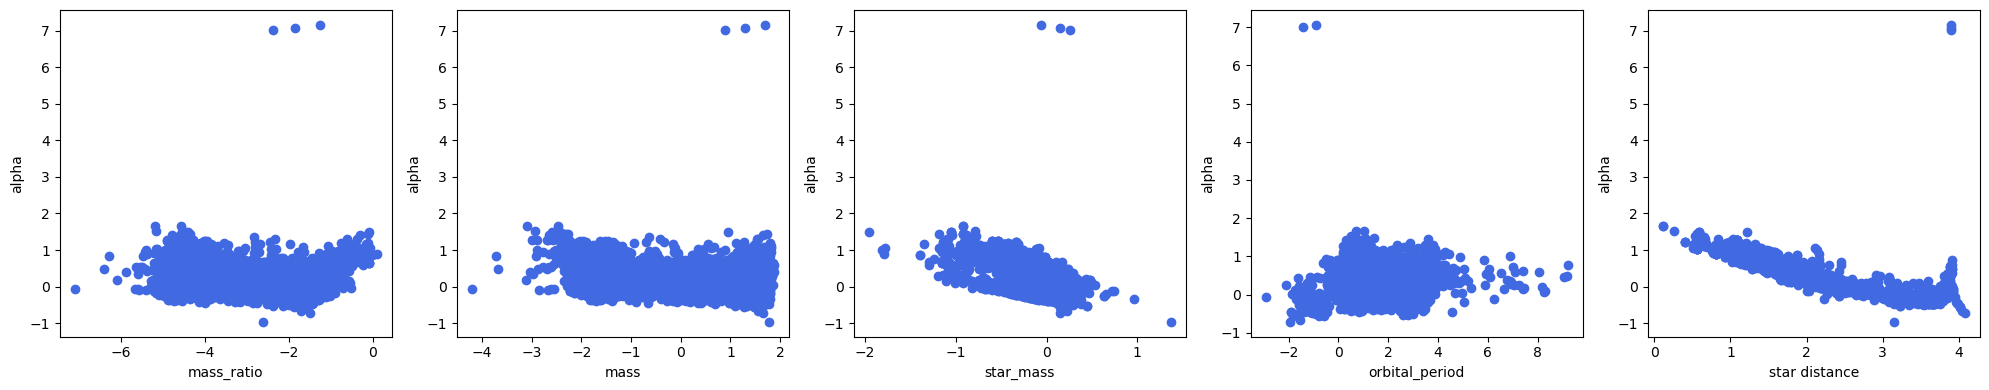

In [37]:

%matplotlib inline
# Function to remove NaN values from both x and y arrays
def filter_nan(x, y):
    # Convert to numeric, forcing invalid values to NaN
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    
    # Ensure data is converted to float (to avoid any type-related issues)
    x = x.astype(float).to_numpy()
    y = y.astype(float).to_numpy()
    
    # Create mask to filter out NaN values in both x and y
    mask = ~np.isnan(x) & ~np.isnan(y)
    return x[mask], y[mask]

# Create subplots in a single row (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

C='royalblue'

# Scatter plot 1: mass_ratio vs alpha
x, y = filter_nan(df['mass_ratio'], df['alpha'])
axes[0].scatter(np.log10(x), np.log10(y),color=C)
axes[0].set_xlabel('mass_ratio')
axes[0].set_ylabel('alpha')

# Scatter plot 2: mass vs alpha
x, y = filter_nan(df['mass'], df['alpha'])
# print(len(y))
axes[1].scatter(np.log10(x), np.log10(y),color=C)
axes[1].set_xlabel('mass')
axes[1].set_ylabel('alpha')

# Scatter plot 3: star_mass vs alpha
x, y = filter_nan(df['star_mass'], df['alpha'])
axes[2].scatter(np.log10(x), np.log10(y),color=C)
axes[2].set_xlabel('star_mass')
axes[2].set_ylabel('alpha')

# Scatter plot 4: orbital_period vs alpha
x, y = filter_nan(df['orbital_period'], df['alpha'])
axes[3].scatter(np.log10(x), np.log10(y),color=C)
axes[3].set_xlabel('orbital_period')
axes[3].set_ylabel('alpha')

# Scatter plot 5: star_distance vs alpha
x, y = filter_nan(df['star_distance'], df['alpha'])
axes[4].scatter(np.log10(x), np.log10(y),color=C)
axes[4].set_xlabel('star distance')
axes[4].set_ylabel('alpha')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


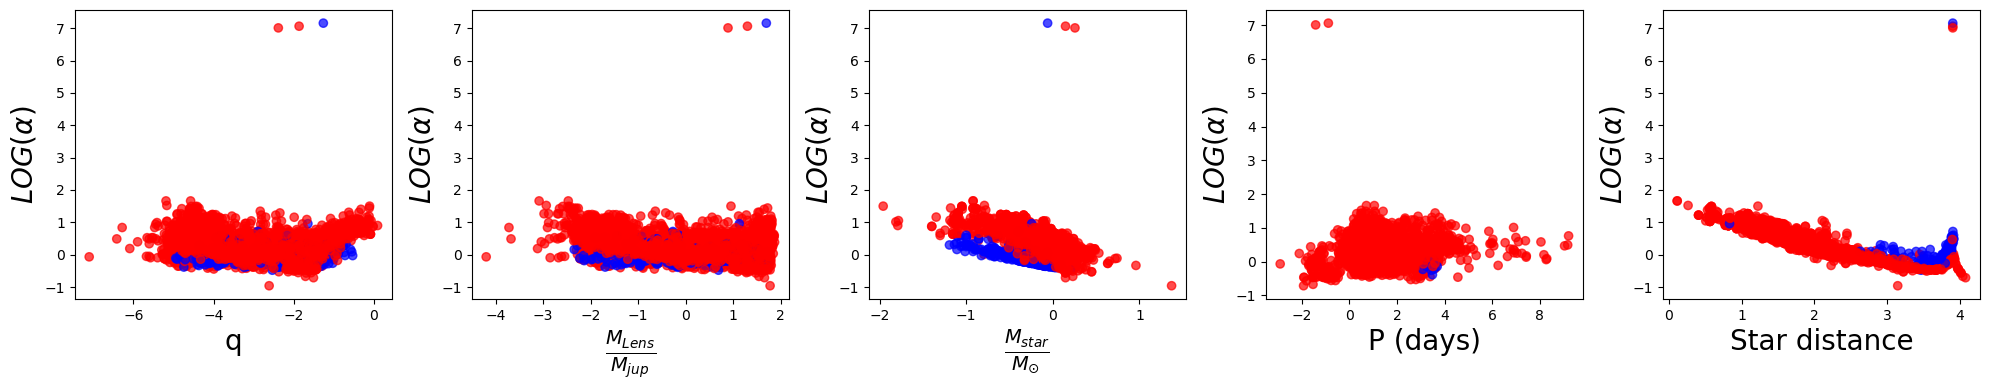

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def filter_nan(x, y):
    # Convert to numeric, forcing invalid values to NaN
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    
    # Ensure data is converted to float (to avoid any type-related issues)
    x = x.astype(float).to_numpy()
    y = y.astype(float).to_numpy()
    
    # Create mask to filter out NaN values in both x and y
    mask = ~np.isnan(x) & ~np.isnan(y)
    return x[mask], y[mask], mask  # Return mask as well

# Assume df is your DataFrame that includes the 'detection_type' column
# Create subplots in a single row (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Create a color mapping based on the detection type
colors = np.where(df['detection_type'] == 'Microlensing', 'blue', 'red')

# Scatter plot 1: mass_ratio vs alpha
x, y, mask = filter_nan(df['mass_ratio'], df['alpha'])
axes[0].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[0].set_xlabel('q',fontsize=20)
axes[0].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 2: mass vs alpha
x, y, mask = filter_nan(df['mass'], df['alpha'])
axes[1].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[1].set_xlabel(r'$\frac{M_{Lens}}{M_{jup}}$',fontsize=20)
axes[1].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 3: star_mass vs alpha
x, y, mask = filter_nan(df['star_mass'], df['alpha'])
axes[2].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[2].set_xlabel(r'$\frac{M_{star}}{M_{\odot}}$',fontsize=20)
axes[2].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 4: orbital_period vs alpha
x, y, mask = filter_nan(df['orbital_period'], df['alpha'])
axes[3].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[3].set_xlabel('P (days)',fontsize=20)
axes[3].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 5: star_distance vs alpha
x, y, mask = filter_nan(df['star_distance'], df['alpha'])
axes[4].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[4].set_xlabel('Star distance',fontsize=20)
axes[4].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [28]:
# import matplotlib.pyplot as plt

# # List of detection types
# detection_types = [
#     'Astrometry', 'Astrometry, Radial Velocity', 'Imaging', 'Imaging, Astrometry',
#     'Imaging, Kinematic', 'Imaging, Other', 'Imaging, Other, Astrometry',
#     'Imaging, Other, Kinematic', 'Imaging, Primary Transit',
#     'Imaging, Radial Velocity, Astrometry', 'Kinematic, Other', 'Microlensing',
#     'Other', 'Other, Imaging', 'Other, Imaging, Kinematic', 'Other, Kinematic',
#     'Other, Radial Velocity', 'Primary Transit', 'Primary Transit, Astrometry',
#     'Primary Transit, Radial Velocity', 'Primary Transit, TTV', 'Radial Velocity',
#     'Radial Velocity, Astrometry', 'Radial Velocity, Imaging',
#     'Radial Velocity, Primary Transit', 'Radial Velocity, Timing', 'TTV', 'Timing',
#     'Timing, Astrometry', 'Timing, Kinematic', 'Timing, Other'
# ]

# # Function to assign color based on detection type
# def get_color(detection_type):
#     if 'Microlensing' in detection_type:
#         return 'red'
#     else:
#         return 'blue'

# # Create a list of colors for each detection type
# colors = [get_color(detection) for detection in detection_types]

# # Plotting
# plt.figure(figsize=(10, 8))
# plt.barh(detection_types, [1] * len(detection_types), color=colors)
# plt.xlabel('Detection Types')
# plt.title('Detection Types Colored by Microlensing (Red) vs Others (Blue)')
# plt.show()


In [ ]:
# plt.scatter(df['mass_ratio'],df['alpha'])
# plt.scatter(df['mass'],df['alpha'])
# plt.scatter(df['star_mass'],df['alpha'])
# plt.scatter(df['orbital_period'],df['alpha'])
# plt.scatter(df['star_distance'],df['alpha'])

# plt.xscale("log")

In [286]:
# import matplotlib.pyplot as plt
# import numpy as np
# from astropy import constants as const
# from astropy import units as u
# import math
# from astropy.constants import c, L_sun, sigma_sb, M_jup, M_earth
# plt.scatter(np.log10(P),np.log10(a))


In [33]:
import pandas as pd
# File path
file_path = "ML_2024.10.15_10.57.52.csv"
# Reading the CSV file with proper handling of quotes and commas
df = pd.read_csv(file_path, quotechar='"', comment='#', skipinitialspace=True)
# Display the dataframe to check if it's read correctly
display(df.head())
df.columns

,pl_name,rastr,ra,decstr,dec,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_masse,...,ml_radeinang,ml_radeinangerr1,ml_radeinangerr2,ml_radeinanglim,ml_pmrells,ml_pmrellserr1,ml_pmrellserr2,ml_pmrellslim,ml_modeldef,htmllink
0,KMT-2019-BLG-1953L b,17h56m27.90s,269.116250,-28d12m04.00s,-28.201111,NaN,NaN,NaN,0.0,NaN,...,0.250,0.020,-0.020,0.0,5.70,0.46,-0.46,0.0,0,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...
1,MOA-2013-BLG-605L b,17h58m42.85s,272.019257,-29d23m53.66s,-29.731583,0.06475,0.0018,-0.021,0.0,20.58,...,0.503,0.034,-0.034,0.0,9.03,0.63,-0.63,0.0,0,<a refstr=SUMI_ET_AL__2016 href=https://ui.ads...
2,KMT-2019-BLG-1953L b,17h56m27.90s,269.116250,-28d12m04.00s,-28.201111,NaN,NaN,NaN,0.0,NaN,...,0.250,0.020,-0.020,0.0,5.70,0.46,-0.46,0.0,0,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...
3,OGLE-2005-BLG-390L b,17h54m19.2s,268.579958,-30d22m38s,-30.377306,0.01700,0.0170,-0.009,0.0,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,<a refstr=BEAULIEU_ET_AL__2006 href=https://ui...
4,OGLE-2012-BLG-0950L b,18h08m04.62s,272.019257,-29d43m53.7s,-29.731583,0.11000,0.0300,-0.020,0.0,36.00,...,0.860,0.150,-0.060,0.0,4.60,0.90,-0.30,0.0,0,<a refstr=KOSHIMOTO_ET_AL__2017 href=https://u...


Index(['pl_name', 'rastr', 'ra', 'decstr', 'dec', 'pl_massj', 'pl_massjerr1',
       'pl_massjerr2', 'pl_massjlim', 'pl_masse', 'pl_masseerr1',
       'pl_masseerr2', 'pl_masselim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'sy_distlim', 'ml_dists', 'ml_distserr1', 'ml_distserr2', 'ml_distslim',
       'ml_tsepmin', 'ml_tsepminerr1', 'ml_tsepminerr2', 'ml_tsepminlim',
       'ml_sepminnorm', 'ml_sepminnormerr1', 'ml_sepminnormerr2',
       'ml_sepminnormlim', 'ml_xtimeein', 'ml_xtimeeinerr1', 'ml_xtimeeinerr2',
       'ml_xtimeeinlim', 'ml_radsnorm', 'ml_radsnormerr1', 'ml_radsnormerr2',
       'ml_radsnormlim', 'ml_sepinsnorp', 'ml_sepinsnorperr1',
       'ml_sepinsnorperr2', 'ml_sepinsnorplim', 'ml_massratio',
       'ml_massratioerr1', 'ml_massratioerr2', 'ml_massratiolim',
       'ml_angstlax', 'ml_angstlaxerr1', 'ml_angstlaxerr2', 'ml_angstl

In [34]:
df['ml_massratio']=df['ml_massratio']*1e-4
df['ml_massratio']

0      0.001910
1      0.000312
2      0.001820
3      0.000076
4      0.000190
         ...   
736    0.001360
737    0.000071
738    0.000057
739    0.001090
740    0.000098
Name: ml_massratio, Length: 741, dtype: float64

In [75]:

# len(df)

# DS
# df

from tqdm.auto import tqdm
i=0
# a = 
ang_sep={}
mass_ratio = {}
mass_star = {}
for i in tqdm(range(len(df))):
    mp = df['pl_massj'].iloc[i]*u.M_jup
    m = df['st_mass'].iloc[i]*u.M_sun#mp+ms
    q = df['ml_massratio'].iloc[i]#mp/ms
    m_star = m/(1+q)
    
    mass_star['pl_name']=m_star
    ds = df['ml_dists'].iloc[i]*u.pc
    dl = df['sy_dist'].iloc[i]*u.pc
    a = df['pl_orbsmax'].iloc[i]*u.AU#df['semi_major_axis'][df['detection_type']=='Microlensing'].iloc[0]
    k = 4*const.G/const.c**2
    
    pi_rel=1/dl-1/ds
    theta_E = (np.sqrt(k*m*pi_rel)*u.rad.to('mas')).decompose()
    # print(theta_E.decompose())
    # print(ds)
    # theta_E = df['ml_radeinang'].iloc[i]#(np.sqrt(k*m*pi_rel).decompose())*(u.rad.to('uas'))
    alpha = (np.arctan(a/dl).decompose()).to('mas').value
    
    s = alpha/theta_E
    # print(s)
    ang_sep[df['pl_name'].iloc[i]]=s
        
    # elif 
# print(ang_sep)

df['alpha']=df['pl_name'].map(ang_sep)
df['mass_ratio']=df['pl_name'].map(mass_ratio)

  0%|          | 0/741 [00:00<?, ?it/s]

In [73]:
# set(df['alpha'])

In [83]:

file_path = "/home/anibal/Downloads/ML_2024.10.15_10.57.52.csv"
df2 = pd.read_csv(file_path, quotechar='"', comment='#', skipinitialspace=True)['pl_name'].values
file_path = "/home/anibal/Downloads/exoplanets_eu.csv"
df = pd.read_csv(file_path, quotechar='"', skipinitialspace=True)['name'].values
# df2
# df

array(['109 Psc b', '112 Psc b', '112 Psc c', ..., 'ZTF J1622+47 b',
       'ZTF J1637+49 b', 'ZTF J2252-05 b'], dtype=object)

In [87]:
# Convert the arrays to sets and find the intersection
repeated_strings = set(df2) & set(df)

# Print the result
print(f"Repeated events: {repeated_strings}")

print(f"Number of events: {len(repeated_strings)}")

Repeated events: {'MOA-2008-BLG-310L b', 'OGLE-2016-BLG-1093L b', 'OGLE-2013-BLG-0911L b', 'OGLE-2017-BLG-0173L b', 'OGLE-2005-BLG-169L b', 'OGLE-2015-BLG-0051L b', 'MOA-2022-BLG-249L b', 'OGLE-2014-BLG-0676L b', 'MOA-2011-BLG-293L b', 'KMT-2023-BLG-1431L b', 'KMT-2021-BLG-1077L b', 'OGLE-2007-BLG-368L b', 'OGLE-2016-BLG-1067L b', 'MOA-2011-BLG-028L b', 'OGLE-2018-BLG-1269L b', 'OGLE-2015-BLG-1771L b', 'MOA-2008-BLG-379L b', 'MOA-2013-BLG-605L b', 'MOA-2010-BLG-073L b', 'OGLE-2012-BLG-0026L b', 'OGLE-2012-BLG-0358L b', 'OGLE-2017-BLG-1691L b', 'OGLE-2018-BLG-0677L b', 'OGLE-2018-BLG-1428L b', 'K2-2016-BLG-0005L b', 'KMT-2021-BLG-1077L c', 'OGLE-2018-BLG-1011L b', 'KMT-2018-BLG-1990L b', 'OGLE-2013-BLG-1761L b', 'KMT-2021-BLG-1150L b', 'KMT-2021-BLG-1689L b', 'OGLE-2013-BLG-0102L b', 'MOA-2016-BLG-319L b', 'MOA-2011-BLG-262L b', 'MOA-2009-BLG-387L b', 'OGLE-2019-BLG-0954L b', 'OGLE-2011-BLG-0173L b', 'OGLE-2005-BLG-071L b', 'KMT-2016-BLG-1836L b', 'OGLE-2012-BLG-0950L b', 'KMT-2018-BLG-